In [103]:
print('helloML')

helloML


In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline
housing = pd.read_csv('housing.data',delim_whitespace=True,header=-1)
housing.columns = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV' ]

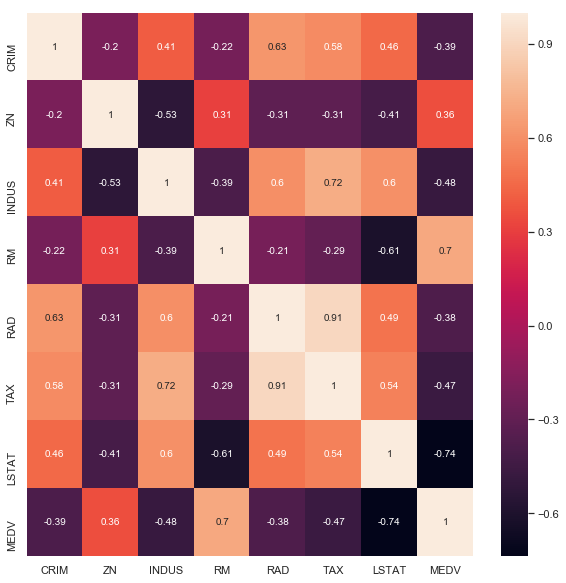

In [105]:
plt.figure(figsize=(10,10))
sns.heatmap(housing[['CRIM','ZN','INDUS','RM','RAD','TAX','LSTAT','MEDV' ]].corr(),annot=True)
plt.show()

# Linear Reg

In [106]:
from sklearn.linear_model import LinearRegression

In [107]:
##select model
##model.fit(reshaped(x),Yasfunction(x))
##use y_pridit = model.predict(reshaped(linspace(x_fit_values)))

In [108]:
x = housing['RM'].values.reshape(-1,1)

In [109]:
y = housing['MEDV'].values

In [110]:
lrModel = LinearRegression()
lrModel.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

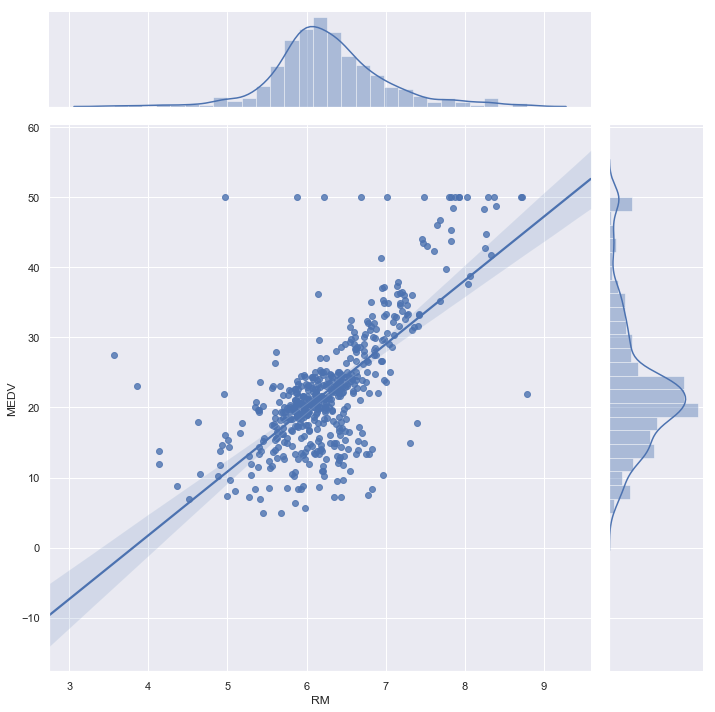

In [111]:
sns.jointplot(x='RM',y='MEDV',data=housing,kind ='reg',height=10)
plt.show()

..............................................
#  Robust Reg

In [112]:
from sklearn.linear_model import RANSACRegressor
x = housing['LSTAT'].values.reshape(-1,1)

In [113]:
ranModel = RANSACRegressor()

In [114]:
ranModel.fit(x,y)

RANSACRegressor(base_estimator=None, is_data_valid=None, is_model_valid=None,
        loss='absolute_loss', max_skips=inf, max_trials=100,
        min_samples=None, random_state=None, residual_threshold=None,
        stop_n_inliers=inf, stop_probability=0.99, stop_score=inf)

In [115]:
inMask = ranModel.inlier_mask_
outMask = ~inMask ##np.logical_not(inMask)

In [116]:
lineX = np.arange(3,50,3)
lineY = ranModel.predict(lineX.reshape(-1,1))

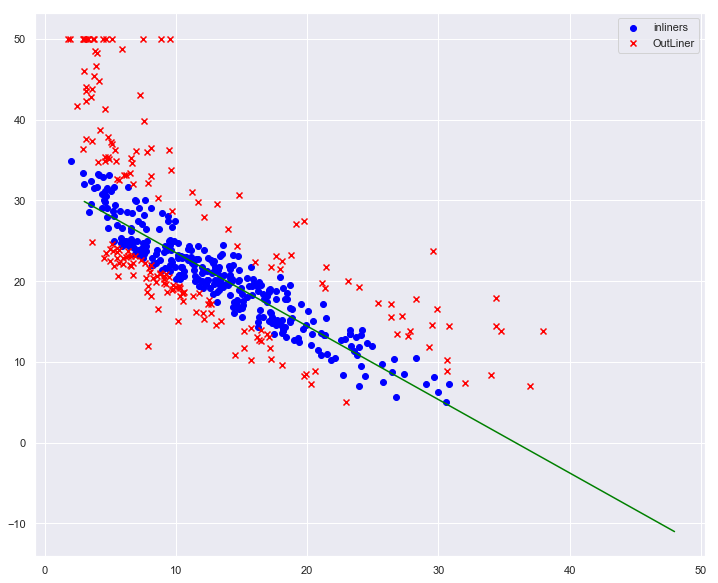

In [117]:
plt.figure(figsize=(12,10));
plt.scatter(x[inMask],y[inMask],c='blue',marker = 'o',label = 'inliners')
plt.scatter(x[outMask],y[outMask],c='red',marker = 'x',label = 'OutLiner')
plt.plot(lineX,lineY,color='green')
plt.legend(loc = 'upper right')
plt.show()

In [118]:
print('y = ',ranModel.estimator_.coef_,'x + ',ranModel.estimator_.intercept_)

y =  [-0.90869223] x +  32.58557687999958


....................................
# performance eval of reg model

In [119]:
from sklearn.model_selection import train_test_split

In [120]:
x = housing.iloc[:,:-1].values
y = housing['MEDV'].values
xTrain, xTest , yTrain, yTest =  train_test_split(x,y,test_size=0.2 ,random_state =0)

In [121]:
lrModel = LinearRegression()
lrModel.fit(xTrain,yTrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [122]:
yTrainPredict = lrModel.predict(xTrain)
yTestPredict = lrModel.predict(xTest)

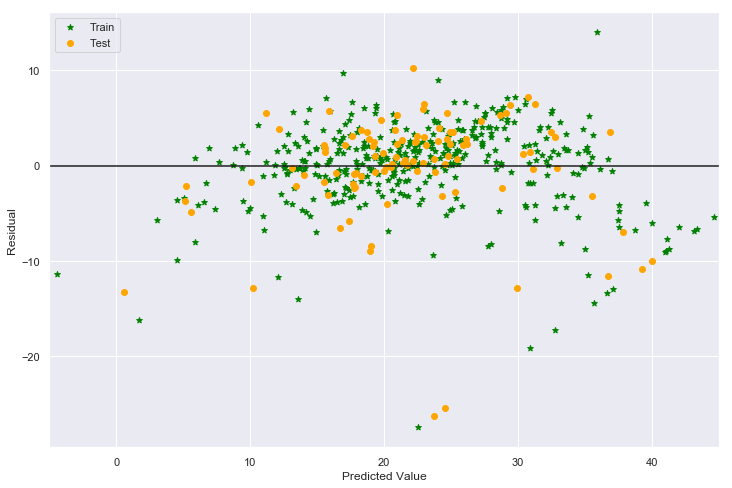

In [123]:
plt.figure(figsize=(12,8))
plt.scatter(yTrainPredict,yTrainPredict-yTrain,color='green',marker='*',label='Train')
plt.scatter(yTestPredict,yTestPredict-yTest,color='orange', marker='o',label='Test')
plt.xlabel('Predicted Value')
plt.ylabel('Residual')
plt.legend(loc = 'upper left')
plt.hlines(y=0,xmin=-5,xmax=45)
plt.xlim([-5,45])
plt.show()

### MSE

In [124]:
from sklearn.metrics import mean_squared_error

In [125]:
print('MSE_Train : ',mean_squared_error(yTrain,yTrainPredict),' MSE_Test: ',mean_squared_error(yTest,yTestPredict))

MSE_Train :  19.326470203585725  MSE_Test:  33.448979997676474


### R2


In [126]:
from sklearn.metrics import r2_score

In [127]:
print('R2_Train : ',r2_score(yTrain,yTrainPredict),' R2_Test: ',r2_score(yTest,yTestPredict))

R2_Train :  0.7730135569264234  R2_Test:  0.5892223849182514


...................................................

# Near Perfect Model

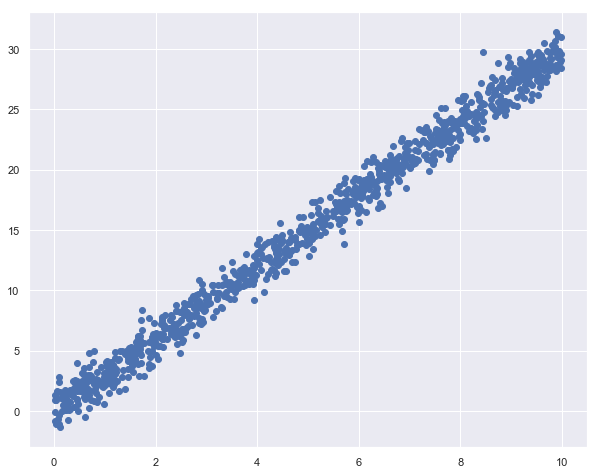

In [128]:
x = 10*np.random.rand(1000)
y = 3*x + np.random.randn(1000)
plt.figure(figsize = (10,8))

plt.scatter(x,y);
plt.show()

In [129]:
from sklearn.model_selection import train_test_split

In [130]:
xTrain, xTest , yTrain, yTest =  train_test_split(x.reshape(-1,1),y,test_size=0.3 ,random_state =0)

In [131]:
lrModel = LinearRegression()
lrModel.fit(xTrain,yTrain)
yTrainPredict = lrModel.predict(xTrain)
yTestPredict = lrModel.predict(xTest)

### residual analysis of npm

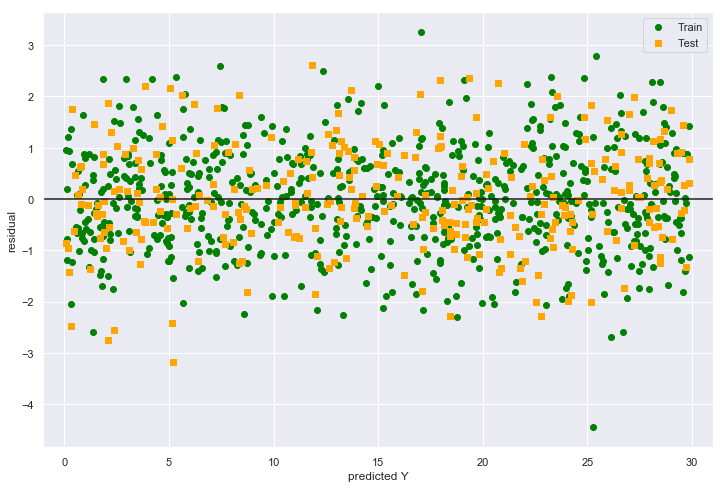

In [132]:
plt.figure(figsize=(12,8))
plt.scatter(yTrainPredict,yTrainPredict-yTrain, color='green', marker='o' , label = 'Train')
plt.scatter(yTestPredict,yTestPredict-yTest, color='orange',marker='s', label = 'Test')
plt.hlines(y=0,xmin = -1,xmax=31)
plt.xlim(-1,31)
plt.xlabel('predicted Y')
plt.legend(loc = 'upper right')
plt.ylabel('residual')
plt.show()

### MSE

In [133]:
from sklearn.metrics import mean_squared_error
print('MSE_Train : ',mean_squared_error(yTrain,yTrainPredict),' MSE_Test: ',mean_squared_error(yTest,yTestPredict))

MSE_Train :  1.0027171097542344  MSE_Test:  1.0133465812708906


### R2

In [134]:
from sklearn.metrics import r2_score
print('R2_Train : ',r2_score(yTrain,yTrainPredict),' R2_Test: ',r2_score(yTest,yTestPredict))

R2_Train :  0.9875273123887675  R2_Test:  0.9873836909038389


   .......................................................
   # Multiple Reg  

In [135]:
from sklearn.datasets import load_boston
bostonData = load_boston()
x = pd.DataFrame(bostonData.data , columns = bostonData.feature_names)
y = bostonData.target ##MEDV

In [136]:
##statsmodel

In [137]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [138]:
xConst = sm.add_constant(x) ##adding bias

C:\Users\q\Anaconda3\envs\iris_2\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [139]:
model = sm.OLS(y,xConst) ##odinary least sq

In [140]:
lrModel = model.fit();
lrModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 17 Apr 2019   Prob (F-statistic):          6.72e-135
Time:                        03:04:46   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [141]:
lrForm = smf.ols(formula = 'y ~ CRIM + ZN + INDUS + CHAS + NOX + RM',data = x)

In [142]:
mlr = lrForm.fit()
#mlr.summary()

.........................
## Corr

In [143]:
pd.options.display.float_format = '{:,.4f}'.format
corrMatrix = housing.corr()
corrMatrix[np.abs(corrMatrix) < 0.5] = 0

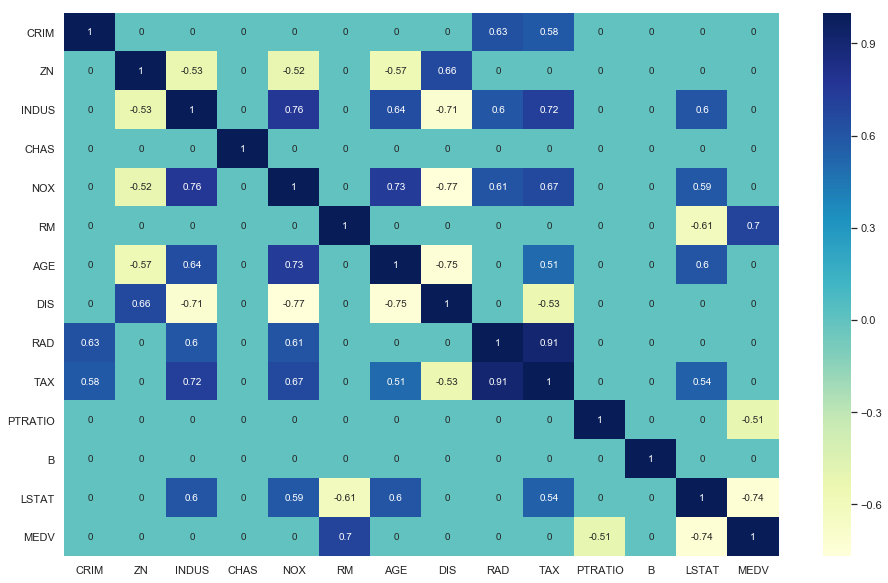

In [144]:
plt.figure(figsize=(16,10))
sns.heatmap(corrMatrix,annot=True,cmap = 'YlGnBu')
plt.show()

In [145]:
eigenValue, eigenVector = np.linalg.eig(housing.corr())

In [146]:
pd.Series(eigenValue).sort_values()

8    0.0603
9    0.1340
12   0.1830
13   0.2128
11   0.2523
10   0.2773
7    0.4031
6    0.5354
5    0.6600
4    0.8509
3    0.8865
2    1.3489
1    1.6495
0    6.5460
dtype: float64

In [147]:
abs(pd.Series(eigenVector[:,8])).sort_values(ascending=False)

9    0.6988
8    0.6350
2    0.2355
13   0.1341
1    0.0963
4    0.0876
12   0.0831
0    0.0591
10   0.0557
7    0.0471
6    0.0382
3    0.0235
11   0.0162
5    0.0072
dtype: float64

In [148]:
print(housing.columns[2],housing.columns[8],housing.columns[9],housing.columns[13])

INDUS RAD TAX MEDV


### standardise variable to identify key features

In [149]:
from sklearn.linear_model import LinearRegression
lrModel = LinearRegression();
lrModel.fit(x,y) ##x,y from mulreg 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [150]:
result = pd.DataFrame(list(zip(lrModel.coef_,housing.columns)),columns=['coefficient','name']).set_index('name')
np.abs(result).sort_values(by='coefficient',ascending=False)

,coefficient
name,
NOX,17.7666
RM,3.8099
CHAS,2.6867
DIS,1.4756
PTRATIO,0.9527
LSTAT,0.5248
RAD,0.3060
CRIM,0.1080
ZN,0.0464


In [151]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
scalar= StandardScaler();
Stand_coef_linear_reg = make_pipeline(scalar,lrModel)

In [152]:
Stand_coef_linear_reg.fit(x,y)
result = pd.DataFrame(list(zip(Stand_coef_linear_reg.steps[1][1].coef_,housing.columns)),columns=['coefficient','name']).set_index('name')
np.abs(result).sort_values(by='coefficient',ascending=False)

,coefficient
name,
LSTAT,3.7436
DIS,3.1040
RM,2.6742
RAD,2.6622
TAX,2.0768
PTRATIO,2.0606
NOX,2.0567
ZN,1.0816
CRIM,0.9281


## R<sup>2</sup>

In [153]:
from sklearn.metrics import r2_score
import statsmodels.formula.api as smf

In [154]:
lrForm = smf.ols(formula = 'y ~ DIS + LSTAT + RM + RAD + TAX + PTRATIO + NOX + ZN + CRIM + B + CHAS + INDUS + AGE',data = x)
benchMark = lrForm.fit()
r2_score(y,benchMark.predict(housing))

0.7406426641094095

In [155]:
#without LSTAT
lrForm = smf.ols(formula = 'y ~ DIS + RM + RAD + TAX + PTRATIO + NOX + ZN + CRIM + B + CHAS + INDUS + AGE',data = x)
benchMark = lrForm.fit()
r2_score(y,benchMark.predict(housing))s

SyntaxError: invalid syntax (<ipython-input-155-37de1d082732>, line 4)

In [156]:
#without NOX
lrForm = smf.ols(formula = 'y ~ DIS + RM + RAD + TAX + PTRATIO + LSTAT + ZN + CRIM + B + CHAS + INDUS + AGE',data = x)
benchMark = lrForm.fit()
r2_score(y,benchMark.predict(housing))

0.7292382183561512

In [157]:
#without AGE
lrForm = smf.ols(formula = 'y ~ DIS + RM + RAD + TAX + PTRATIO + NOX + ZN + CRIM + B + CHAS + INDUS + LSTAT',data = x)
benchMark = lrForm.fit()
r2_score(y,benchMark.predict(housing))

0.7406412165505145